## Introduction to NLP Fundamentals in TensorFLow

NLP has the goal of deriving information out of natural lenguage(could be sequences text or speech)

Another common term for NLP problems is sequence to sequence problems (seq2seq).


## Check for GPU

In [75]:
!nvidia-smi 

Wed May 19 20:27:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    30W /  70W |    842MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get helper functions

In [76]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-05-19 20:27:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-05-19 20:27:42 (107 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [77]:
# Import series of helper functions for the notebook

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP datasets (text samples of Tweets labelled as disaster or not disasster).

See  the original source here:
https://www.kaggle.com/c/nlp-getting-started

In [78]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2021-05-19 20:27:43--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.81.208, 142.251.33.208, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.81.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2021-05-19 20:27:43 (132 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [79]:
# Unzip data

unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

To visualze or text samples, we first have to read them in, one way to do so would' be to use  Python : https://realpython.com/read-write-files-python/

but i prefer to get visual straight away

So another way to do this is to use pandas.

In [80]:
import pandas as pd

train_df = pd.read_csv("train.csv")

test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [81]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [82]:
# Shuffle training dataframe

train_df_shuffled = train_df.sample(frac=1, random_state=42)

train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [83]:
# What does the test dataframe look like ?

test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [84]:
# How many examples of each class?
train_df.target.value_counts()


0    4342
1    3271
Name: target, dtype: int64

In [85]:
# How many total samples?

len(train_df), len(test_df)

(7613, 3263)

In [86]:

# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples


for  row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():

  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")

  print(f"Text:\n{text}\n")

  print("----\n")

Target: 0 (not real disaster)
Text:
Photo: Sketch I did based on the A Taste of Armageddon episode of #startrek #tos http://t.co/a2e6dcsk88

----

Target: 0 (not real disaster)
Text:
Spot fixing/match fixing ..anyone???
Or it has to be Pak SL WI RSA or BD to say this. Sham on them who say that when these team collapse

----

Target: 0 (not real disaster)
Text:
Help me win $$$$ by having the most shares on my article! A Lifetime Of Fear http://t.co/9eh2lCQkxl  Thanks! #BlackInAmerica #GrowingUpBlack

----

Target: 0 (not real disaster)
Text:
@tsunami_esh ESH PLEASE OKAY!

----

Target: 1 (real disaster)
Text:
17 dead as Afghanistan aircraft crashes: An Afghan military helicopter has crashed in a remote region of the s...  http://t.co/kI9eHjHl8y

----



### Split data into training and validation sets



In [87]:
from sklearn.model_selection import train_test_split




In [88]:
# Use train_test_split to split training data into training and validation sets

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # use 10% of training data for validation split
                                                                            random_state=42)

In [89]:
# Check the lengths

len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)


(6851, 6851, 762, 762)

In [90]:
len(train_df_shuffled)

7613

In [91]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

When dealing with a text  problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.


There are a few ways to this, namely:

* Tokenization - direct mapping of token( a token could be a word or character) to number

* Embdeding - create a matrix of featrue vector for each token

(thi size of feature vector can be defined and this embding cn be learned)







#### Text vctorization (tokenization)

In [92]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [93]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [94]:
# ngram agrupa palabras

# Use the dafault TextVectorization parameters

text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",

                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers

                                    output_sequence_length=None, # how long do yoy want your sequences to be
                                    pad_to_max_tokens =True)

In [95]:
len(train_sentences[0].split())

7

In [96]:
# Find the average number of tokens ( words) in the training tweets
# comprension de listas
round(sum([len(i.split()) for i in train_sentences]))/len(train_sentences)

14.901036345059115

In [97]:
# Setup text vectorization variables

max_vocab_length = 10000 # max number of words to have in our vocabulary

max_length = 15 # max length or sequences will be (e.g how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    # truncar cuando las palabras superen la longitud maxima
                                    output_sequence_length=max_length)

In [98]:

train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [99]:
max_length

15

In [100]:


# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [101]:
# Create a sample sentence and tokenize it 

sample_sentence = "There's a flood in my street!"

text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [102]:
# Choose  a random sentence from the training dataset and tokenize it

random_sentence = random.choice(train_sentences)

print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
It's Time To Reduce Gun Deaths http://t.co/ilADQEBxPn      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  37,   92,    5, 1780,  849,  401,    1,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [103]:
# Get the unique words in the vocubulary

words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our training data

top_5_words = words_in_vocab[:5]# get the most common words

bottom_5_words = words_in_vocab[-5:] # get the least commom words

In [104]:
print(f"Number of words in vocab: {len(words_in_vocab)}")

print(f"5 most commom words: {top_5_words}")

print(f"5 least commom words:{bottom_5_words} ")

Number of words in vocab: 10000
5 most commom words: ['', '[UNK]', 'the', 'a', 'in']
5 least commom words:['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'] 


In [105]:
train_sentences

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

### Creating an Embedding using an  Embedding Layer

To make our embedding, we're going to use a TensorFlow's embedding layer:

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding


The parameters we care most about for our embedding layer :

* `input_dim` = the size of our vocabulary

* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long


* `input_length` = length of the sequences being passed to the embedding layer


In [106]:
# las redes neuronales en general trabajan bien con numeros divisibles entre 8,  ""8 bites"""
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # output shape
                             embeddings_initializer="uniform",
                             input_length=max_length # how long is each inputs
                             )

embedding

In [107]:
# Get a random sentence from  the training  set

random_sentence = random.choice(train_sentences)

print(f"Original text:\n {random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence(turn it into dense vectors of fixed size)

sample_embed = embedding(text_vectorizer([random_sentence]))

sample_embed

# shape (1, 15, 128) una secuencia,  de 15 tokem,  cada token esrepresentado en un tensor de 128 columnas

Original text:
 #Kisii Police in Kisii hunt for students over failed arson plot: Police in Kisii hunt for students... http://t.co/m5SbFRrSn7 #CountyNews      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.00295902,  0.036076  , -0.00997729, ..., -0.02423167,
         -0.00714157,  0.03777386],
        [-0.04647094, -0.04386315,  0.04668761, ...,  0.03859678,
         -0.03995545,  0.04478165],
        [-0.03451636,  0.00721534, -0.04561032, ..., -0.0499254 ,
         -0.04208442, -0.02866522],
        ...,
        [-0.03451636,  0.00721534, -0.04561032, ..., -0.0499254 ,
         -0.04208442, -0.02866522],
        [-0.00295902,  0.036076  , -0.00997729, ..., -0.02423167,
         -0.00714157,  0.03777386],
        [ 0.0167037 ,  0.02465456, -0.04470638, ...,  0.01245612,
         -0.04945585,  0.01367659]]], dtype=float32)>

In [108]:
# check out a single token's embedding

sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.00295902,  0.036076  , -0.00997729,  0.02087246, -0.01433954,
         0.02001742, -0.04825124,  0.04698775, -0.01476764,  0.04036553,
        -0.03821922,  0.01950983,  0.04150486, -0.02276665,  0.02964005,
        -0.02605143,  0.00160643,  0.03322976, -0.02558115,  0.01371903,
         0.04260086, -0.04160755,  0.04011642, -0.04184914,  0.00841483,
         0.02913494,  0.02843669,  0.03901101,  0.02669178,  0.03069327,
        -0.01747691, -0.02815646, -0.01560196, -0.01371734, -0.03716233,
         0.0303461 ,  0.01202228,  0.00900973, -0.03262325,  0.00470941,
         0.00797925, -0.01721667, -0.03902738, -0.03629287, -0.00275875,
         0.02448435, -0.02486085, -0.00663201, -0.01716683,  0.03291636,
        -0.01110569,  0.02136454,  0.01976686,  0.00812441, -0.01017692,
         0.03832689,  0.03309773, -0.00725966, -0.01886185, -0.04589787,
        -0.03904481,  0.00989337, -0.00595839, -0.0023253 , -0.04011704,
  

## Modelling a text dataset (running a series of experiments)


Now we've a got way to turn our text sequences into numbers,

it's time to start building a series of modelling experiments.

We'll start with a baseline and move on from there.

* Model 0 : Naive bayes (baseline), this is from Sklearn Ml map:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

* Model 1: Feed-forward neural network ( dense model)

* Model 2: LSTM model (RNN)


* Model 3: GRU model (RNN)


* Model 4: Bidirectional-LSTM model (RNN)

* Model 5: 1D Convulutional Neural Network ( CNN)

* Model 6: TensorFlow Hub Pretrained Feature Extractor ( using transfer learning for NLP)

*  Model 7: Same as model 6 with 10 % of training data

How are we going to approach all of these?


Use the standard steps in modelling with tensorflow:

* Create a model

* Build a model


* Fit a model


* Evaluate our model








*

### Model 0: Getting a baseline

As with all machine learning modelling experiment, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

> **Note:** It's common practice to use non-Dl as a baseline because of their speed and then later using Dl to see if you can imrove upon them.


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import  MultinomialNB

from sklearn.pipeline import Pipeline



# Create tokenization and modelling pipeline

# pipeline es muy parecido a sequential de tf hay que pasarle una lista de tuplas
model_0 = Pipeline([
                    
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    #"clf" es classfier
                    ("clf", MultinomialNB()), # model the text
])


# Fit the pipline to the training data

model_0.fit(train_sentences, train_labels)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [110]:
# Evaluate our baseline model
# score == evaluate en tf
baseline_score = model_0.score(val_sentences, val_labels)

print(f"Our baseline model achieves an accuracy of:{baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of:79.27%


In [111]:
train_df.target.value_counts()

train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [112]:
# Make predictionss

baseline_preds = model_0.predict(val_sentences)

baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [113]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

### Creating an evaluation function for our model experiments

we could evaluate all of our model's predictions with different metrics every time, however, this will be cumbersome and could easily be fixed with a function


Let's create one to compare out model's predictions with the truth labels using the following metrics:

* Accuracy

* Precision
* Recall

* F1-score

for a deep overview of many different evaluation methods, see the sklearn documentation

https://scikit-learn.org/stable/modules/model_evaluation.html

In [114]:
# Function to evaluate: accuracy, precision, recall, f1-score

from sklearn.metrics import accuracy_score, precision_recall_fscore_support


def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.


  
  """
  # Calculate model accuracy

  model_accuracy = accuracy_score(y_true, y_pred) * 100

  # Calculate model precision, recall and f1-score using "weighted" average

  # "_" blank variable en python
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1":model_f1}

  return model_results             



In [115]:
# Get baseline results

baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)

baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [116]:
from helper_functions import calculate_results

### Model 1:  A simple dense model

In [117]:
# Create a tensorboard callback (need to create a new one for each model)

from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs

SAVE_DIR = "model_logs"

In [118]:
# Build model with the Functional API

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers

x = embedding(x) # create an embedding of the numerized inputs

# paso de una representacion de  128 por token a 128 por secuencia
x = layers.GlobalAveragePooling1D()(x)#condense  the  feature vector for each token to one vector
outputs= layers.Dense(1, activation="sigmoid")(x) # Create the output layer, want binary outputs so use sigmoid activation function

model_1 = tf.keras.Model(inputs, outputs, name ="model_1_dense")



In [119]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_3 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [120]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_3 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [121]:
# Compile model

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [122]:
# Fit the model

model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              #hacemos una tupla (sentence, labels)
                              validation_data=(val_sentences, val_labels),

                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1 Dense")]
                              )

Saving TensorBoard log files to: model_logs/model_1 Dense/20210519-202744
Epoch 1/5
215/215 [==============================] - 4s 17ms/step - loss: 0.6533 - accuracy: 0.6468 - val_loss: 0.5351 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4580 - accuracy: 0.8152 - val_loss: 0.4707 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3501 - accuracy: 0.8684 - val_loss: 0.4579 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2857 - accuracy: 0.8956 - val_loss: 0.4622 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2350 - accuracy: 0.9169 - val_loss: 0.4833 - val_accuracy: 0.7874


In [123]:
# Check the reuslts
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7874


[0.4832972586154938, 0.787401556968689]

In [124]:
# Make some predictions and evaluate those

model_1_pred_probs = model_1.predict(val_sentences)

model_1_pred_probs.shape

(762, 1)

In [125]:
# look at a single prediction
# como el threshold is 0.5, todo lo que este por encima vale 1,  lo que esta por debajo  sera 0
model_1_pred_probs[0]

array([0.29127592], dtype=float32)

In [126]:
# look at the first

model_1_pred_probs[:10]

array([[0.29127592],
       [0.8385098 ],
       [0.99714476],
       [0.09846418],
       [0.10191789],
       [0.93386585],
       [0.92662877],
       [0.9925581 ],
       [0.9602174 ],
       [0.24100985]], dtype=float32)

In [127]:
val_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [128]:
model_1_pred_probs.shape

(762, 1)

In [129]:
# Convert model prediction probabilities to label format
# apples with apples (hacemos esto para luego comparar manzanas con manzanass)
model_1_preds= tf.squeeze(tf.round(model_1_pred_probs))

model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [130]:
# Calculate our model_1 results

model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'f1': 0.7838012115396069,
 'precision': 0.7942180127180873,
 'recall': 0.7874015748031497}

In [131]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [132]:
import numpy as np

np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Viasulizing learned embedding

In [133]:
words_in_vocab

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'be',
 'are',
 'was',
 'have',
 'like',
 'as',
 'up',
 'so',
 'just',
 'but',
 'me',
 'im',
 'your',
 'not',
 'amp',
 'out',
 'its',
 'will',
 'an',
 'no',
 'has',
 'fire',
 'after',
 'all',
 'when',
 'we',
 'if',
 'now',
 'via',
 'new',
 'more',
 'get',
 'or',
 'about',
 'what',
 'he',
 'people',
 'news',
 'been',
 'over',
 'one',
 'how',
 'dont',
 'they',
 'who',
 'into',
 'were',
 'do',
 'us',
 '2',
 'can',
 'video',
 'emergency',
 'there',
 'disaster',
 'than',
 'police',
 'would',
 'his',
 'still',
 'her',
 'some',
 'body',
 'storm',
 'crash',
 'burning',
 'suicide',
 'back',
 'man',
 'california',
 'why',
 'time',
 'them',
 'had',
 'buildings',
 'rt',
 'first',
 'cant',
 'see',
 'got',
 'day',
 'off',
 'our',
 'going',
 'nuclear',
 'know',
 'world',
 'bomb',
 'fires',
 'love',
 'killed',
 'go',
 'attack',
 'youtube',
 'dead

In [134]:
# Get the vocabulary from text vectorization layer

words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [135]:
max_vocab_length

10000

In [136]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_3 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Get the weight matrix of embedding layer

# (these are the numerical representations of each token in our training data, which have been learned for -5 epochs)

embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
embed_weights

array([[-1.9919420e-02,  5.3546228e-02,  5.6923139e-03, ...,
        -2.0012170e-02,  3.8066633e-02, -3.0100802e-03],
       [ 1.3580940e-02, -3.4799263e-02, -2.6586788e-02, ...,
        -6.4763180e-03, -2.2140022e-02, -2.1767857e-02],
       [-1.1442009e-02, -2.5690785e-02,  7.9655426e-04, ...,
        -9.4965473e-03,  2.0742415e-02, -3.1610884e-02],
       ...,
       [ 2.4014834e-02,  2.2706080e-02, -1.1803698e-02, ...,
        -1.0966301e-02,  2.9018287e-02,  4.5574557e-02],
       [-7.3391020e-02,  2.0473832e-03,  4.5915684e-05, ...,
         6.0534891e-02,  3.3988159e-02,  5.0648670e-03],
       [-4.4150911e-02,  1.8490301e-02,  7.2147891e-02, ...,
         5.5408888e-02,  1.6841916e-02,  3.2054663e-02]], dtype=float32)

In [138]:
# cada token se convierte en 128 vector
print(embed_weights.shape) # same size as vocab size and embedding_dim

(10000, 128)


Now we've got  the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.


To do so, TensorFlow has a handy tool called projector: http://projector.tensorflow.org/


And TensorFlor also  has an incredible guide on word embeddings themselves:

https://www.tensorflow.org/tutorials/text/word_embeddings

In [139]:

embed_weights

array([[-1.9919420e-02,  5.3546228e-02,  5.6923139e-03, ...,
        -2.0012170e-02,  3.8066633e-02, -3.0100802e-03],
       [ 1.3580940e-02, -3.4799263e-02, -2.6586788e-02, ...,
        -6.4763180e-03, -2.2140022e-02, -2.1767857e-02],
       [-1.1442009e-02, -2.5690785e-02,  7.9655426e-04, ...,
        -9.4965473e-03,  2.0742415e-02, -3.1610884e-02],
       ...,
       [ 2.4014834e-02,  2.2706080e-02, -1.1803698e-02, ...,
        -1.0966301e-02,  2.9018287e-02,  4.5574557e-02],
       [-7.3391020e-02,  2.0473832e-03,  4.5915684e-05, ...,
         6.0534891e-02,  3.3988159e-02,  5.0648670e-03],
       [-4.4150911e-02,  1.8490301e-02,  7.2147891e-02, ...,
         5.5408888e-02,  1.6841916e-02,  3.2054663e-02]], dtype=float32)

In [140]:
# Create embedding files (we got this from tensorflow word embeddings documentation)
import io
out_v = io.open('vector.tsv', 'w', encoding='utf-8')

out_m = io.open('metadata.tsv', 'w', encoding='utf-8')


for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue # skip 0, it's padding
  vec = embed_weights[index]

  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [141]:
# Download files from colab to upload to projector

try:
  from google.colab import files
  files.download('vector.tsv')
  files.download('metadata.tsv')
except Exception:
  pass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks (RNN's)

RNN's are useful for sequence data.

THe premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

If you want an overview of the internals of a recurrent neural network,

see the following: - MIT's sequence modelling lecture
https://www.youtube.com/watch?v=qjrad0V0uJE&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2&ab_channel=AlexanderAmini


- Chris olah intro lstm https://colah.github.io/posts/2015-08-Understanding-LSTMs/


- Andrej  Karpathy's the unreasonable effectivenes of recurrent neural network

-http://karpathy.github.io/2015/05/21/rnn-effectiveness/






In [142]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

### Model: LSTM

LSTM  = long short term memory ( one of the most popular LSTM cells)


Our structure of an RNN typically looks like this:


```
Input (text) - > Tokenize --> Embedding --> Layers (RNNs>dense)---> Output ( label probability)
```


In [143]:
# Create an LSTM model
 
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")

x =  text_vectorizer(inputs)

x = embedding(x)

# print(x.shape)
# en nuestro caso cada secuencia es un timesteps
x = layers.LSTM(units=64, return_sequences=True)(x) # When you're  stacking RNN celss together, you need to set return_sequences = True

# print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
# x = layers.Dense(64, activation="relu" )(x)
# print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name ="model_2_LSTM")

In [144]:
# Get a summary

model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_3 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 15, 64)            49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 1,362,497
Trainable params: 1,362,497
Non-trainable params: 0
____________________________________________

In [145]:

# Compile the model

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [146]:
# Fit the model
model_2.histor = model_2.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(val_sentences, val_labels),
                             callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                    "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20210519-202803
Epoch 1/5
215/215 [==============================] - 8s 24ms/step - loss: 0.2866 - accuracy: 0.8948 - val_loss: 0.6585 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1639 - accuracy: 0.9433 - val_loss: 0.6338 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1303 - accuracy: 0.9537 - val_loss: 0.7379 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0917 - accuracy: 0.9649 - val_loss: 0.8088 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0696 - accuracy: 0.9730 - val_loss: 0.9493 - val_accuracy: 0.7717


In [147]:
# make prediction with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)

model_2_pred_probs[:10]


array([[1.9370083e-02],
       [8.6944681e-01],
       [9.9990273e-01],
       [1.9203041e-01],
       [1.4766376e-04],
       [9.9916697e-01],
       [9.5298594e-01],
       [9.9992526e-01],
       [9.9990582e-01],
       [4.6194616e-01]], dtype=float32)

In [148]:
# Convert model 2 pred probs to labels

model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

model_2_preds[:10]




<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [149]:
val_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [150]:

# Calculate model 2 results

model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)

model_2_results

{'accuracy': 77.16535433070865,
 'f1': 0.7705026760144871,
 'precision': 0.7717840407633899,
 'recall': 0.7716535433070866}

In [151]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 3: GRU

Another popular  and effective RNN componnet is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.



In [152]:
# Build a  RNN using the GRU cell

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)

x = text_vectorizer(inputs)

x = embedding(x)

#x = layers.GRU(64,return_sequences=True )(x) # if  you want to stack recurrent layers on top of each other, you need retunr sequences =True

# x = layers.LSTM(64, return_sequences=True)(x)


# x = layers.GRU(64)(x)

#x =  layers.GlobalAveragePooling1D()(x)

x = layers.GRU(64)(x)
#x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")



In [153]:

model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_3 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [154]:
# Compile the model

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [155]:

# Fit the model

model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              # recordar poner como tupla
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20210519-202827
Epoch 1/5
215/215 [==============================] - 6s 20ms/step - loss: 0.2732 - accuracy: 0.8841 - val_loss: 0.6916 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0778 - accuracy: 0.9726 - val_loss: 0.7642 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0669 - accuracy: 0.9767 - val_loss: 0.9705 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0577 - accuracy: 0.9761 - val_loss: 1.1329 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0481 - accuracy: 0.9786 - val_loss: 1.1739 - val_accuracy: 0.7717


In [156]:


# Make some predictions with our Gru model

model_3_pred_probs = model_3.predict(val_sentences)

model_3_pred_probs

array([[9.14899483e-02],
       [8.78023088e-01],
       [9.99778569e-01],
       [7.10171834e-02],
       [8.57292180e-05],
       [9.99352276e-01],
       [9.81259644e-01],
       [9.99896288e-01],
       [9.99781787e-01],
       [6.17835760e-01],
       [2.93910620e-04],
       [9.33644593e-01],
       [3.64830514e-04],
       [2.13246211e-01],
       [9.16056597e-05],
       [1.11712900e-03],
       [2.33766870e-04],
       [4.63896955e-04],
       [2.03561839e-02],
       [9.99373257e-01],
       [9.99950528e-01],
       [6.37314588e-05],
       [9.98758435e-01],
       [7.80036265e-04],
       [9.99862432e-01],
       [9.99839902e-01],
       [2.38468958e-04],
       [7.47232116e-04],
       [4.51080967e-04],
       [8.03143620e-01],
       [9.94105935e-01],
       [3.03031178e-04],
       [4.41803150e-02],
       [1.15892384e-03],
       [7.65665114e-01],
       [3.02946210e-01],
       [9.99499798e-01],
       [1.64439604e-01],
       [1.00120772e-02],
       [9.99823630e-01],


In [157]:
# Convert model 3 pred probs to labels

model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

model_3_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [158]:
# Calculate model 3 results

model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)

model_3_results

{'accuracy': 77.16535433070865,
 'f1': 0.7709684019624822,
 'precision': 0.7713581681518764,
 'recall': 0.7716535433070866}

### Model 4: Bidirectional RNN

 Normal Rnn's go from left to right (just like you'd read an English sentence) however, a bidirectional RNN goes from right to left as well as left to right.



In [159]:
# Build's  a bidirectional RNN in TensorFlow

from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)

x = embedding(x)

# le pasamos una lstm normal o Gru
# la bidirectional  multiplica por 2 el numero de unidades
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(64))(x)

# print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")




(None, 15, 128)


In [160]:
# Get aa summary
model_4.summary()


Model: "model_4_bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_3 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [161]:
# Compile model

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [162]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20210519-202847
Epoch 1/5
215/215 [==============================] - 8s 24ms/step - loss: 0.1998 - accuracy: 0.9429 - val_loss: 1.0595 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0548 - accuracy: 0.9770 - val_loss: 1.1465 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0409 - accuracy: 0.9803 - val_loss: 1.2689 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0416 - accuracy: 0.9835 - val_loss: 1.0896 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0437 - accuracy: 0.9788 - val_loss: 1.5416 - val_accuracy: 0.7612


In [163]:
# make predictions with our bidirectional model

model_4_pred_probs = model_4.predict(val_sentences)

model_4_pred_probs

array([[2.89978320e-03],
       [5.33329964e-01],
       [9.99979615e-01],
       [2.04243094e-01],
       [1.37366569e-05],
       [9.99839544e-01],
       [8.21488440e-01],
       [9.99989152e-01],
       [9.99978662e-01],
       [9.96210217e-01],
       [4.12479785e-05],
       [8.94083619e-01],
       [3.80921338e-05],
       [3.22373182e-01],
       [1.76951944e-05],
       [2.96637329e-04],
       [3.79795456e-05],
       [1.31829729e-05],
       [1.92816500e-02],
       [9.99864817e-01],
       [9.99751747e-01],
       [1.63137320e-05],
       [9.99835134e-01],
       [1.04062492e-04],
       [9.99972463e-01],
       [9.99978185e-01],
       [8.30785939e-05],
       [1.55114540e-04],
       [4.40383374e-05],
       [8.05781305e-01],
       [9.98773158e-01],
       [6.89899141e-04],
       [1.40668079e-02],
       [8.41962828e-05],
       [1.57093734e-01],
       [2.38910958e-01],
       [9.99969959e-01],
       [3.68440390e-01],
       [1.22980296e-03],
       [9.99976158e-01],


In [164]:
# Convert  pred probs to pred labels


model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

model_4_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0

In [165]:
# Calculate the results of our bidirectional model


model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)


In [166]:
model_4_results

{'accuracy': 76.11548556430446,
 'f1': 0.7600554649035874,
 'precision': 0.7610421046068336,
 'recall': 0.7611548556430446}

In [167]:

model_3_results

{'accuracy': 77.16535433070865,
 'f1': 0.7709684019624822,
 'precision': 0.7713581681518764,
 'recall': 0.7716535433070866}

## Convolution Neural Networks for Text ( and other types of sequences)


We've used CNNS for images but images are typicaly 2D ( height * width... however, our text data is 1D).


Previosly we've Conv2D for our image data but now we're going to use Conv1D.



The typical structure of a Conv1D model for sequences( in our case, text) :

```
Inputs(text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) ---> outputs (class probabilites)



```


### Model 5: Conv1D


For different explanations of parameters

see:

https://poloclub.github.io/cnn-explainer/ ( this is for 2D

 but can relate to 1D data)

 Difference between "same" and "valid"

 https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t#:~:text=%22SAME%22%20%3A%20output%20size%20is,No%20padding%20occurs.



In [168]:
# Test out our embedding layer, Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # Turn target sequence into embedding

conv_1d = layers.Conv1D(filters=32,
                        # pasa por 5 palabras cada vez
                        kernel_size=5,# this is also referred to as an ngram of 5 (meaning it looks at 5 words at a time)
                        activation="relu",
                        strides=1, # default
                        padding="valid")# default="valid", the output is smaller than the input shape, "same" means output is same shape as input

conv_1d_output =conv_1d(embedding_test) # pass test embedding through conv1d layer

# usamos maxpool 1 D porque estamos usando Conv1D
# pasa de columnas por token a columnas por secuencia
max_pool = layers.GlobalMaxPool1D()

max_pool_output = max_pool(conv_1d_output)# equivalent to "get the most impportant feature" o r get the feature with the highest value


embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [169]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-4.4487283e-02,  3.7554555e-02, -1.7149701e-03, ...,
         -3.1113544e-02,  1.2212623e-02,  1.8180544e-02],
        [-2.0312587e-02,  3.9960016e-03,  5.5520065e-02, ...,
         -6.8008937e-02,  2.3437817e-02, -5.7659697e-02],
        [-4.2228781e-02, -6.2546082e-02,  8.2094118e-02, ...,
         -9.3881518e-02,  3.3434000e-02,  3.9950683e-05],
        ...,
        [-2.2558838e-02,  3.3286326e-02, -6.1731846e-03, ...,
         -3.4897663e-02,  3.2161631e-02, -3.6686177e-03],
        [-2.2558838e-02,  3.3286326e-02, -6.1731846e-03, ...,
         -3.4897663e-02,  3.2161631e-02, -3.6686177e-03],
        [-2.2558838e-02,  3.3286326e-02, -6.1731846e-03, ...,
         -3.4897663e-02,  3.2161631e-02, -3.6686177e-03]]], dtype=float32)>

In [170]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.        , 0.04173951, 0.01545784, 0.03560931, 0.        ,
         0.        , 0.        , 0.        , 0.04624949, 0.01297183,
         0.09860897, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.01987983, 0.0521689 , 0.        , 0.07146688,
         0.0161502 , 0.        , 0.01544063, 0.03456417, 0.03073361,
         0.        , 0.        , 0.00552946, 0.01109513, 0.        ,
         0.04657618, 0.        ],
        [0.        , 0.06934471, 0.01190964, 0.02117247, 0.04347256,
         0.        , 0.00829177, 0.        , 0.        , 0.        ,
         0.02309174, 0.        , 0.        , 0.        , 0.04400741,
         0.02095994, 0.        , 0.        , 0.03700632, 0.02357951,
         0.00890619, 0.01865904, 0.        , 0.0424427 , 0.03995974,
         0.01757801, 0.        , 0.01860271, 0.01616792, 0.04987159,
         0.04107301, 0.        ],
        [0.        , 0.01176424, 0.0215527 , 0.0329

In [171]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.02940332, 0.06934471, 0.04355573, 0.03560931, 0.04347256,
        0.        , 0.04663507, 0.02574735, 0.04624949, 0.08113967,
        0.09860897, 0.00394933, 0.02081626, 0.01099513, 0.04400741,
        0.06749237, 0.03794729, 0.0521689 , 0.06853893, 0.07146688,
        0.08043899, 0.08855399, 0.01544063, 0.0424427 , 0.06689519,
        0.01757801, 0.03662629, 0.05525988, 0.01616792, 0.04987159,
        0.04657618, 0.05067527]], dtype=float32)>

In [172]:
# Create 1-dimensional convultional layer to model sequence

from tensorflow.keras import layers

inputs = layers.Input(shape=(1, ), dtype=tf.string)

x = text_vectorizer(inputs)

x =embedding(x)

x = layers.Conv1D(filters=64, kernel_size=5, strides= 1, activation="relu", padding ="valid") (x)

x = layers.GlobalMaxPooling1D()(x)

# x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")


# Compile Conv1D

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Get a summary of our Conv1D model

model_5.summary()



Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_3 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            41024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
__________________________________________

In [173]:
# Fit the model

model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20210519-202913
Epoch 1/5
215/215 [==============================] - 5s 19ms/step - loss: 0.1830 - accuracy: 0.9476 - val_loss: 0.8956 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0698 - accuracy: 0.9741 - val_loss: 1.0371 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0572 - accuracy: 0.9761 - val_loss: 1.1357 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0506 - accuracy: 0.9794 - val_loss: 1.1316 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0498 - accuracy: 0.9787 - val_loss: 1.2012 - val_accuracy: 0.7612


In [174]:

# Make some proedictions with our Conv1D model

model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[5.7292217e-01],
       [8.8474548e-01],
       [9.9995613e-01],
       [4.6378639e-02],
       [2.3448832e-08],
       [9.9603683e-01],
       [9.7861302e-01],
       [9.9998438e-01],
       [9.9999952e-01],
       [8.8569951e-01]], dtype=float32)

In [175]:
# Convert model 5 pred probs to labels


model_5_pred = tf.squeeze(tf.round(model_5_pred_probs))

model_5_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [176]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_pred)

model_5_results

{'accuracy': 76.11548556430446,
 'f1': 0.7603477266511175,
 'precision': 0.7608241679589117,
 'recall': 0.7611548556430446}

In [177]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Now we ve built a few of our own models, let s try and  use  TensorFlow hubs Universal Sentence econder: 
https://tfhub.dev/google/universal-sentence-encoder/4

In [183]:
sample_sentence

"There's a flood in my street!"

In [182]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embed_samples = embed([sample_sentence,
                       "When you can the universal encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157027  0.02485911  0.02878048 -0.012715    0.03971538  0.08827761
  0.02680985  0.05589839 -0.01068729 -0.00597292  0.00639323 -0.0181952
  0.00030814  0.09105889  0.05874645 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865346 -0.04209306  0.02678981  0.03011008  0.00321069
 -0.00337971 -0.04787357  0.02266719 -0.00985925 -0.04063613 -0.01292093
 -0.04666385  0.056303   -0.03949255  0.00517688  0.02495828 -0.07014441
  0.02871509  0.04947684 -0.00633978 -0.08960193  0.02807117 -0.00808362
 -0.01360601  0.0599865  -0.10361787 -0.05195374  0.00232955 -0.0233253
 -0.03758106  0.0332773 ], shape=(50,), dtype=float32)


In [185]:
# the universal sentence  enconder transforma las sentencias a un vector de  512
embed_samples.shape 

TensorShape([2, 512])

In [186]:
# Create a Keras  Layer using the USE pretrained layer from tensorflow hub

sentence_enconder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                         
                                         # la entrada en esta mmodelo puede ser variable
                                         input_shape=[],
                                         dtype=tf.string,
                                         trainable=False,
                                         name="USE")

In [197]:
# Create model using the Sequential API

model_6 = tf.keras.Sequential([
              sentence_enconder_layer,

              layers.Dense(64, activation="relu"),

              layers.Dense(1,activation="sigmoid")



],name = "model_6_USE")

# Compile 

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_10 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [198]:
# Train  a classifier on top of USE pretrained embedding

model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels ),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20210519-210614
Epoch 1/5
215/215 [==============================] - 4s 16ms/step - loss: 0.5801 - accuracy: 0.7301 - val_loss: 0.4525 - val_accuracy: 0.7953
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4147 - accuracy: 0.8127 - val_loss: 0.4382 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4014 - accuracy: 0.8196 - val_loss: 0.4327 - val_accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3890 - accuracy: 0.8276 - val_loss: 0.4325 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3821 - accuracy: 0.8331 - val_loss: 0.4294 - val_accuracy: 0.8150


In [199]:
# Make predictions with USE TF Hub Model

model_6_pred_probs = model_6.predict(val_sentences)

model_6_pred_probs[:10]


array([[0.21274607],
       [0.8047888 ],
       [0.9883769 ],
       [0.21002233],
       [0.73464936],
       [0.7433437 ],
       [0.98213875],
       [0.9802198 ],
       [0.9480369 ],
       [0.09805269]], dtype=float32)

In [200]:
# Covert prediction  probabilities to labels

model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [201]:
val_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [202]:
# Calculate model 6 perfomance metrics

model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)

model_6_results

{'accuracy': 81.49606299212599,
 'f1': 0.8136303789632117,
 'precision': 0.8166816944448522,
 'recall': 0.8149606299212598}

In [203]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [205]:
len(train_df)

7613

# Model 7: Tf Hub Pretrained USE but with 10% of training data 

Transfer learning really helps when you don't have a large dataset.

To see how our model perfoms on smaller dataset, let's replicate ` model 6` except we'll train it on 10 % of the data



In [206]:


# Create subsets of 10% of the training data

train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [207]:
## NOTE: Making data splits like below leads to data leakage(model_7 trained on 10% data, outperforms model_6 trained on 100% data)

## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET




# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)

# train_sentences_10_percent = train_10_percent["text"].to_list()

# train_labels_10_percent =  train_10_percent["target"].to_list()

# len(train_sentences_10_percent), len(train_labels_10_percent)



(761, 761)

**Note:** Be "very" carefull when creating training/val/test splits that you don't leak data across the datasets,otherwise your model evaluation metrics will be wrong. IF something looks too good to be true ( a model trained on 10% of data outperforming the same model trained on 100% of data) trust yout gut and go back through to find where the error may lie.


In [220]:
# Making a better dataset split( no data leakage)

train_10_percent_split = int(0.1 * len(train_sentences))

train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_sentences_10_percent), len(train_labels_10_percent)


(685, 685)

In [224]:
# Check the number of each label in the updated training data subset

pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [217]:
len(train_sentences)

6851

In [208]:
# Check the number of targets in our subset of data
# verficamos el ratio para ver si es un subconjunto representativo
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [209]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

To recreate a model the same to a as a previous model you've created you can use the `tf.keras.models.clone_model()`




In [225]:
# Let's build a model the same as model_6
#model_7 = tf.keras.models.clone_model(model_6)

model_7 = tf.keras.Sequential([
              sentence_enconder_layer,

              layers.Dense(64, activation="relu"),

              layers.Dense(1,activation="sigmoid")



],name = "model_7_USE")

# compile model

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



# Get a summary(will be same as model_6)

model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_14 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [226]:
# Fit the model to the 10% training data subsets

model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20210519-222537
Epoch 1/5
22/22 [==============================] - 3s 89ms/step - loss: 0.6793 - accuracy: 0.6393 - val_loss: 0.6437 - val_accuracy: 0.7270
Epoch 2/5
22/22 [==============================] - 0s 20ms/step - loss: 0.6076 - accuracy: 0.8085 - val_loss: 0.5851 - val_accuracy: 0.7743
Epoch 3/5
22/22 [==============================] - 0s 20ms/step - loss: 0.5323 - accuracy: 0.8202 - val_loss: 0.5347 - val_accuracy: 0.7835
Epoch 4/5
22/22 [==============================] - 0s 19ms/step - loss: 0.4855 - accuracy: 0.8191 - val_loss: 0.5056 - val_accuracy: 0.7822
Epoch 5/5
22/22 [==============================] - 0s 19ms/step - loss: 0.4279 - accuracy: 0.8355 - val_loss: 0.4899 - val_accuracy: 0.7756


In [227]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)

model_7_pred_probs[:10]


array([[0.20899825],
       [0.59499437],
       [0.9201053 ],
       [0.37378317],
       [0.54206306],
       [0.67855227],
       [0.8781928 ],
       [0.80955833],
       [0.8391253 ],
       [0.15685485]], dtype=float32)

In [228]:
# Turn pred probs into labels

model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

model_7_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [229]:
# Evaluate model 7 predictions

model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)

model_7_results

{'accuracy': 77.55905511811024,
 'f1': 0.7737412623092624,
 'precision': 0.7769617885542762,
 'recall': 0.7755905511811023}

In [231]:
model_6_results

{'accuracy': 81.49606299212599,
 'f1': 0.8136303789632117,
 'precision': 0.8166816944448522,
 'recall': 0.8149606299212598}

In [230]:
# hay que tener cuidado cuando separamos el data set para evitar data leakage (filtracion) y tner por tanto resultados erroes como el del modelo 7 de arriba



## Comparing the perfomance of each of our models

In [232]:
# Combine model results into a DataFrame 

all_model_results = pd.DataFrame(
    
    {"0_baseline": baseline_results,
     "1_simple_dense":model_1_results,
     "2_lstm": model_2_results,
     "3_gru": model_3_results,
     "4_bidirectional": model_4_results,
     "5_conv1d": model_5_results,
     "6_tf_hub_use_encoder": model_6_results,
     "7_tf_hub_use_enconder_10_percent":model_7_results
                                  
                                  
                                  
                                  },
                                 
                                 
                                 
                                 )

In [236]:
all_model_results= all_model_results.transpose()

In [237]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100








In [238]:
all_model_results.head()

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.787402,0.794218,0.787402,0.783801
2_lstm,0.771654,0.771784,0.771654,0.770503
3_gru,0.771654,0.771358,0.771654,0.770968
4_bidirectional,0.761155,0.761042,0.761155,0.760055


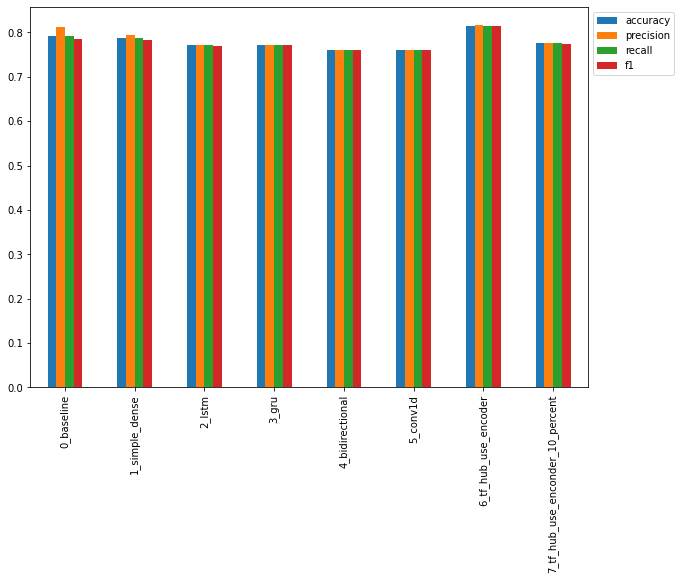

In [239]:
# Plot and compare all of the model results

all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

# .legend(bbox_to_anchor=(1.0, 1.0)) es para que la leyenda aparezca afuera

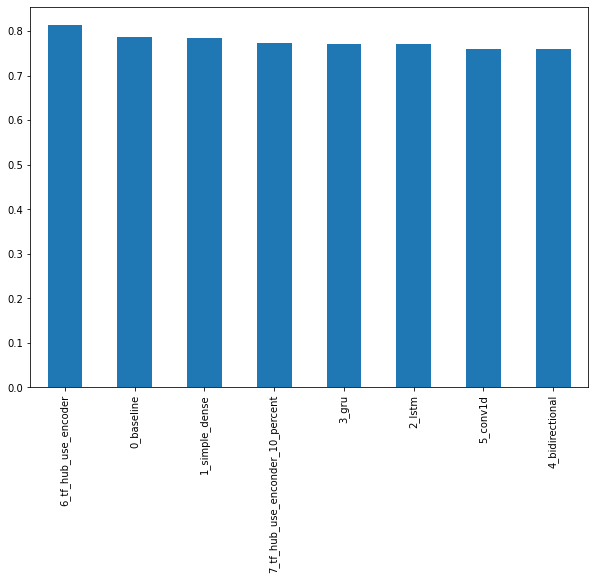

In [240]:
# Sort model results by f1-score


all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

## Uploading our model training logs to Tensorboard dev

We can further inspect our model's performance using https://tensorboard.dev/

> **Resource:** TensorBoard is great for quickly tracking experiment but

for larger scale experiment and a whole bunch more tracking options, check out Weights & Biasses:
 https://wandb.ai/site
 

In [241]:
# View TensorBoard logs  of trnasfer learning modelling experiments (plus all of our other models)

# Upload TensorBoard dev records



!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modelling Experiments ZTM TF Course Video" \
  --description "Comparing multiple different types of model architectures on the Kaggle Tweets text classification dataset" \
  --one_shot # exit the uploader once  uploading is finished

2021-05-19 23:07:12.714126: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3

Now i've ran the cell above, my modelling experiments are visable on TensorBoard.dev : https://tensorboard.dev/experiment/GzKyZm4jRWyIeEWzlLeMKw/

In [242]:
# See the previous TensorBoard Dev experiments you've run.
!tensorboard dev list

2021-05-19 23:16:43.430767: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
https://tensorboard.dev/experiment/GzKyZm4jRWyIeEWzlLeMKw/
	Name                 [No Name]
	Description          [No Description]
	Id                   GzKyZm4jRWyIeEWzlLeMKw
	Created              2021-05-19 23:08:10 (8 minutes ago)
	Updated              2021-05-19 23:08:21 (8 minutes ago)
	Runs                 22
	Tags                 3
	Scalars              220
	Tensor bytes         0
	Binary object bytes  9234386
https://tensorboard.dev/experiment/CNiNjK5kRKmVadrH6AvYTg/
	Name                 [No Name]
	Description          [No Description]
	Id                   CNiNjK5kRKmVadrH6AvYTg
	Created              2021-05-18 13:48:42
	Updated              202

In [ ]:
# If you need to delete an experiment from TensorBoar, you can run the following:

# !tensorboard dev delete --experiment_id GzKyZm4jRWyIeEWzlLeMKw

## Saving and loading a trained model

There are two main formats to save a model to in TensorFlow:

1. The HDF5 format

2. The` SavedModel` format(this is the default when using TensorFlow

In [243]:
model_6_results


{'accuracy': 81.49606299212599,
 'f1': 0.8136303789632117,
 'precision': 0.8166816944448522,
 'recall': 0.8149606299212598}

In [244]:
# Save Tf Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")


In [245]:


# Load model with custom Hub layer (requiered HDF5 format)
import tensorflow_hub  as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            # le pasamos un diccionario con la clave llamaando al tipo de custom objets
                                            custom_objects={"KerasLayer":hub.KerasLayer})

In [246]:
# How does our loaded model perform?

loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4294 - accuracy: 0.8150


[0.42944374680519104, 0.8149606585502625]

In [247]:
model_1_results

{'accuracy': 78.74015748031496,
 'f1': 0.7838012115396069,
 'precision': 0.7942180127180873,
 'recall': 0.7874015748031497}

Now let's save to the `SavedModel` format....

In [248]:
# Save TF hub sentence Encoder model to SavedModel format(default)


model_6.save("model_6_SavedModel_format")


Exception ignored in: <function CapturableResourceDeleter.__del__ at 0x7f2c31a0c710>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/tracking.py", line 208, in __del__
    self._destroy_resource()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 871, in _call
    self._initialize(args, kwds, add_initializers_to=initializers)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 726, in _initialize
    *args, **kwds))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/function.py", line 2969, in _get_concrete_function_internal_garbage_collected
    graph_function, _ = self._maybe_define_function(args, kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/p

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [249]:
# Load in a model from the SavedModel format

# el salvado anterior me devuelve un directorio, mientras que este me devuelve  una carpeta file
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [251]:
# Evaluate model in SavedModel Format

loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 8ms/step - loss: 0.4294 - accuracy: 0.8150


[0.42944374680519104, 0.8149606585502625]

##  Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?

*  And of thesse wrong examples which ones is it getting *most* wrong (those will prediction probabilities closest to the oppositive class)

For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.999 (really close to 1) and vice versa

In [253]:
# Download a pretrained model from Google Storage

!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

!unzip  08_model_6_USE_feature_extractor.zip

--2021-05-20 00:04:26--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 172.217.164.144, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip.1’

08_model_6_USE_feat 100%[===================>] 916.27M   242MB/s    in 4.3s    

2021-05-20 00:04:30 (214 MB/s) - ‘08_model_6_USE_feature_extractor.zip.1’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variabl

In [256]:
# Import previously trained model from Google Storage

model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")

model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 8ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [260]:
# Make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)

model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))

model_6_pretrained_preds[:10] # these should be in label format




<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [263]:
# Create DataFrame with validation sentences, validation labels and best performing model predictions labels + probabilites

val_df = pd.DataFrame({"text": val_sentences,
                       
                       "target":val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)})

val_df.head()



,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [264]:
# Find the wrong predictions and sort by predictions probabilities

most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

# falses positvos

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


Let's remind ourselves of the target labels...

* `0`=not disaster

* `1` = disaster

In [265]:
# falsos negativos
most_wrong.tail()

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [266]:
# Check the false  positives (model predicted 1 when should've been 0)

for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row

  print(f"Target: {target}, pred:{pred}, prob: {pred_prob}")

  print(f"text:\n{text}\n")
  print("----\n")

Target: 0, pred:1.0, prob: 0.9101957678794861
text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, pred:1.0, prob: 0.8769820928573608
text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, pred:1.0, prob: 0.8523000478744507
text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, pred:1.0, prob: 0.8354544639587402
text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, pred:1.0, prob: 0.8272132873535156
text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, pred:1.0, prob: 0.8148158192634583
text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Tar

In [268]:
# Check the false  negatives (model predicted 0 when should've been 1)

for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row

  print(f"Target: {target}, pred:{pred}, prob: {pred_prob}")

  print(f"text:\n{text}\n")
  print("----\n")

Target: 1, pred:0.0, prob: 0.06730346381664276
text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, pred:0.0, prob: 0.05507579818367958
text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, pred:0.0, prob: 0.05460337549448013
text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, pred:0.0, prob: 0.05459698289632797
text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, pred:0.0, prob: 0.04963727295398712
text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, pred:0.0, prob: 0.043918490409851074
text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, pred:0.0, prob: 0.04208685

In [269]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


# Making predictions on the test dataset



In [271]:
# Making predictions on the test dataset and visualizing them

test_sentences = test_df["text"].to_list()

test_sentences[:5]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan']

In [275]:
test_samples = random.sample(test_sentences, 10)

for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model ex[ects a list as input]
  pred = tf.round(pred_prob)
  print(f"Pred:{int(pred)},  Prob: {pred_prob}" )
  print(f"Text:\n{test_sample}\n")
  print("------\n")

Pred:0,  Prob: 0.37449008226394653
Text:
TWIA board approves 5 percent rate hike: The Texas Windstorm Insurance Association (TWIA) Board of Directors v... http://t.co/NvxLJDsNkX

------

Pred:0,  Prob: 0.20570088922977448
Text:
Reddit Is Planning to 'Quarantine' Its Most Toxic Communities http://t.co/KlVxYN2EJK #mcgtech

------

Pred:1,  Prob: 0.9923925399780273
Text:
Remembering Sgt.-Maj. Roni Ghanem 28 of Maghar murdered by Hamas terrorists in the suicide bombing of Egged bus No. 361 13 years ago today

------

Pred:0,  Prob: 0.03170809894800186
Text:
@BattyAfterDawn @DrawLiomDraw he's a good cute.  The kind of cute I want to obliterate.

------

Pred:0,  Prob: 0.35067081451416016
Text:
Send me flying off a cliff straight through the smoke of my spliff

------

Pred:1,  Prob: 0.8780890703201294
Text:
You knew that Israel is a world leader in lifesaving emergency services. And now looking far beyond Haiti and... http://t.co/49N6YzAjvd

------

Pred:0,  Prob: 0.10882695764303207
Text:


## Your challange.... predicting on Tweets from the wild

Go to your favorite Twitter account and copy one of their latest Tweets

then pass that Tweet through our trained model.

Is that Tweet a disaster or not disaster (according to the model) ?

## The speed/score tradeoff

velocidad de la prediccion

In [276]:
model_6_results

{'accuracy': 81.49606299212599,
 'f1': 0.8136303789632117,
 'precision': 0.8166816944448522,
 'recall': 0.8149606299212598}

In [277]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [278]:
# Let's make a function to measure the time of prediction

import time

def pred_timer(model, samples):

  """
  Times how long a model takes to make predicitons on samples/



  
  
  """

  start_time = time.perf_counter() # get start time

  model.predict(samples)

  end_time = time.perf_counter() # get finish time

  total_time = end_time - start_time # Calculate how long predictions took to make

  time_per_pred = total_time/len(samples)

  return total_time, time_per_pred




In [279]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples=val_sentences)

model_6_total_pred_time, model_6_time_per_pred


(0.21305693300018902, 0.0002796022742784633)

In [280]:
# Calculate our baseline model times per pred
# inference= prediction
baseline_total_pred_time, baseline_time_per_pred =pred_timer(model_0, val_sentences)

baseline_total_pred_time, baseline_time_per_pred

(0.021403538001322886, 2.808863254766783e-05)

In [281]:

model_6_pretrained_results = calculate_results(y_true=val_labels,
                                       y_pred=model_6_pretrained_preds)

model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'f1': 0.8148082644367335,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651}

Text(0, 0.5, 'F1-score')

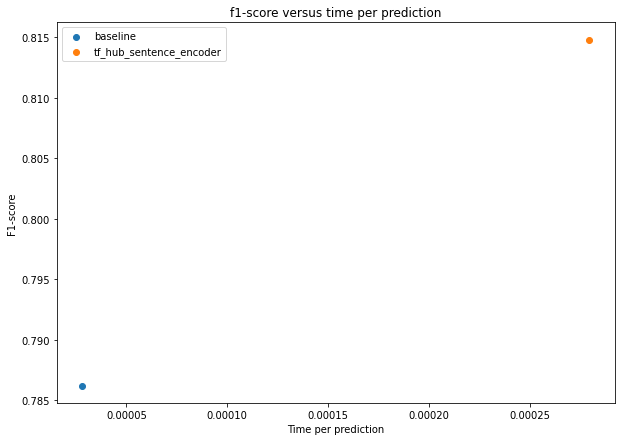

In [282]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.scatter(baseline_time_per_pred, baseline_results["f1"], label ="baseline")

plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")

plt.legend()
plt.title("f1-score versus time per prediction")

plt.xlabel("Time per prediction")

plt.ylabel("F1-score")
